In [3]:
import pandas as pd
import requests
import json
from pandas_datareader import data


In [4]:
ticker = 'TSLA'

si_data = requests.get(f'https://api.nasdaq.com/api/quote/{ticker}/short-interest?assetClass=stocks',
                    headers={"Accept-Language": "en-US,en;q=0.9",
                             "Accept-Encoding": "gzip, deflate, br",
                             "User-Agent": "Java-http-client/"}).text


In [12]:
price_data = data.DataReader(ticker, 'yahoo', '2020-10-01', '2021-10-03')

In [7]:
data_json = json.loads(si_data)
si_df = pd.json_normalize(data_json, record_path=['data','shortInterestTable', 'rows'])
si_df['date'] = pd.to_datetime(si_df['settlementDate'])
si_df

,settlementDate,interest,avgDailyShareVolume,daysToCover,date
0,09/15/2021,"26,999,741","16,561,475",1.630274,2021-09-15
1,08/31/2021,"27,432,219","17,361,855",1.580028,2021-08-31
2,08/13/2021,"26,828,057","17,287,331",1.551891,2021-08-13
3,07/30/2021,"29,914,139","20,929,992",1.429248,2021-07-30
4,07/15/2021,"32,355,387","21,704,535",1.490720,2021-07-15
5,06/30/2021,"34,093,281","25,464,832",1.338838,2021-06-30
6,06/15/2021,"39,363,717","21,688,018",1.814998,2021-06-15
7,05/28/2021,"40,042,086","28,281,529",1.415839,2021-05-28
8,05/14/2021,"39,869,947","28,531,060",1.397423,2021-05-14
9,04/30/2021,"41,382,433","28,138,768",1.470655,2021-04-30


In [8]:
ibd_content = requests.get(f'https://iborrowdesk.com/api/ticker/{ticker}').text


In [14]:
ibd_json = json.loads(ibd_content)
ibd_df = pd.json_normalize(ibd_json, record_path=['daily'])
ibd_df['date'] = pd.to_datetime(ibd_df['time'])
ibd_df

,available,fee,time,date
0,9800000,0.2500,2020-10-05,2020-10-05
1,10000000,0.2500,2020-10-06,2020-10-06
2,10000000,0.2500,2020-10-07,2020-10-07
3,10000000,0.2500,2020-10-08,2020-10-08
4,10000000,0.2500,2020-10-09,2020-10-09
...,...,...,...,...
255,10000000,0.2601,2021-09-27,2021-09-27
256,10000000,0.2500,2021-09-28,2021-09-28
257,10000000,0.2500,2021-09-29,2021-09-29
258,10000000,0.2500,2021-09-30,2021-09-30


<AxesSubplot:xlabel='date'>

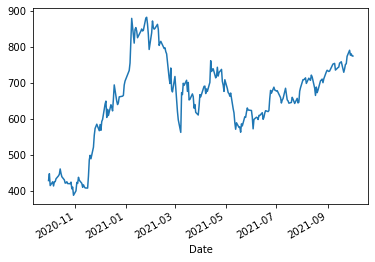

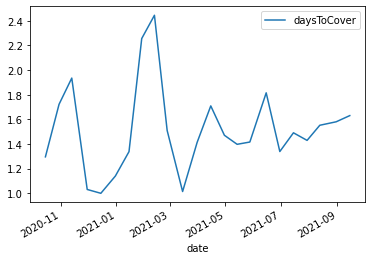

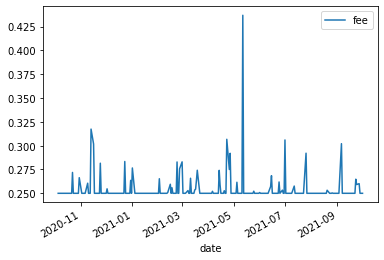

In [15]:
price_data['Adj Close'].plot()
si_df.plot(x='date')
ibd_df.plot(x='date', y='fee')